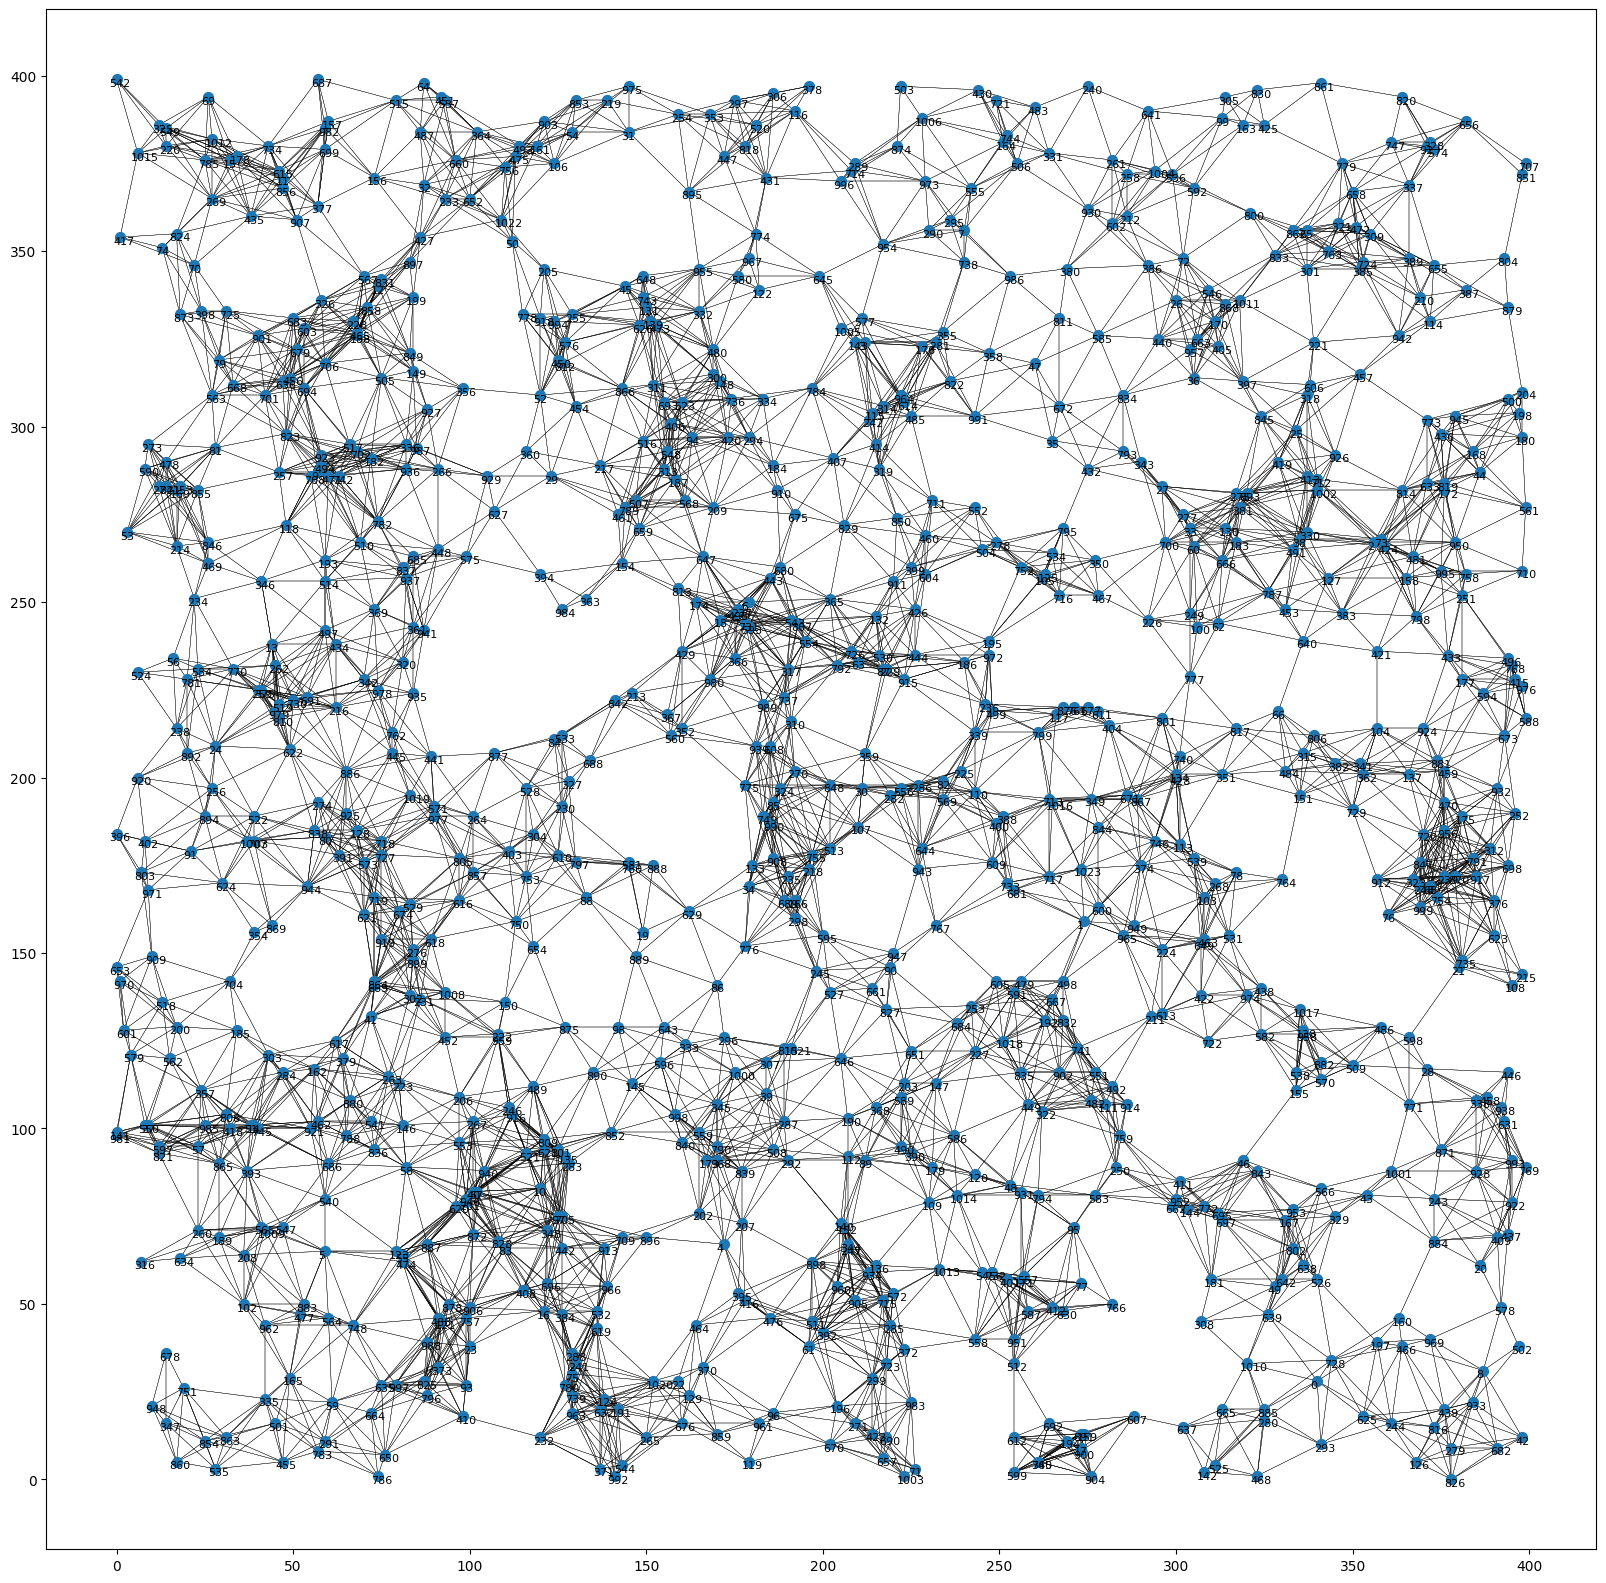

In [2]:
import matplotlib.pyplot as plt

from algorithms.aStar import aStar
from algorithms.bfs import bfs
from algorithms.dfs import dfs
from algorithms.dijkstras import dijkstras
from algorithms.bidirectional import bidirectional
from algorithms.idaStar import idaStar
from algorithms.aco import aco

import utils

plt.rcParams['figure.figsize'] = [20, 20]

N = 1024
maxLength = 25
sX = 400
sY = 400

points, adjList = utils.createRandomGraph2(N, sX, sY, maxLength)
# visualize
utils.visualize(points, adjList)

In [6]:
dfs_path = dfs(adjList, utils.getDistance, points, 542, 599)

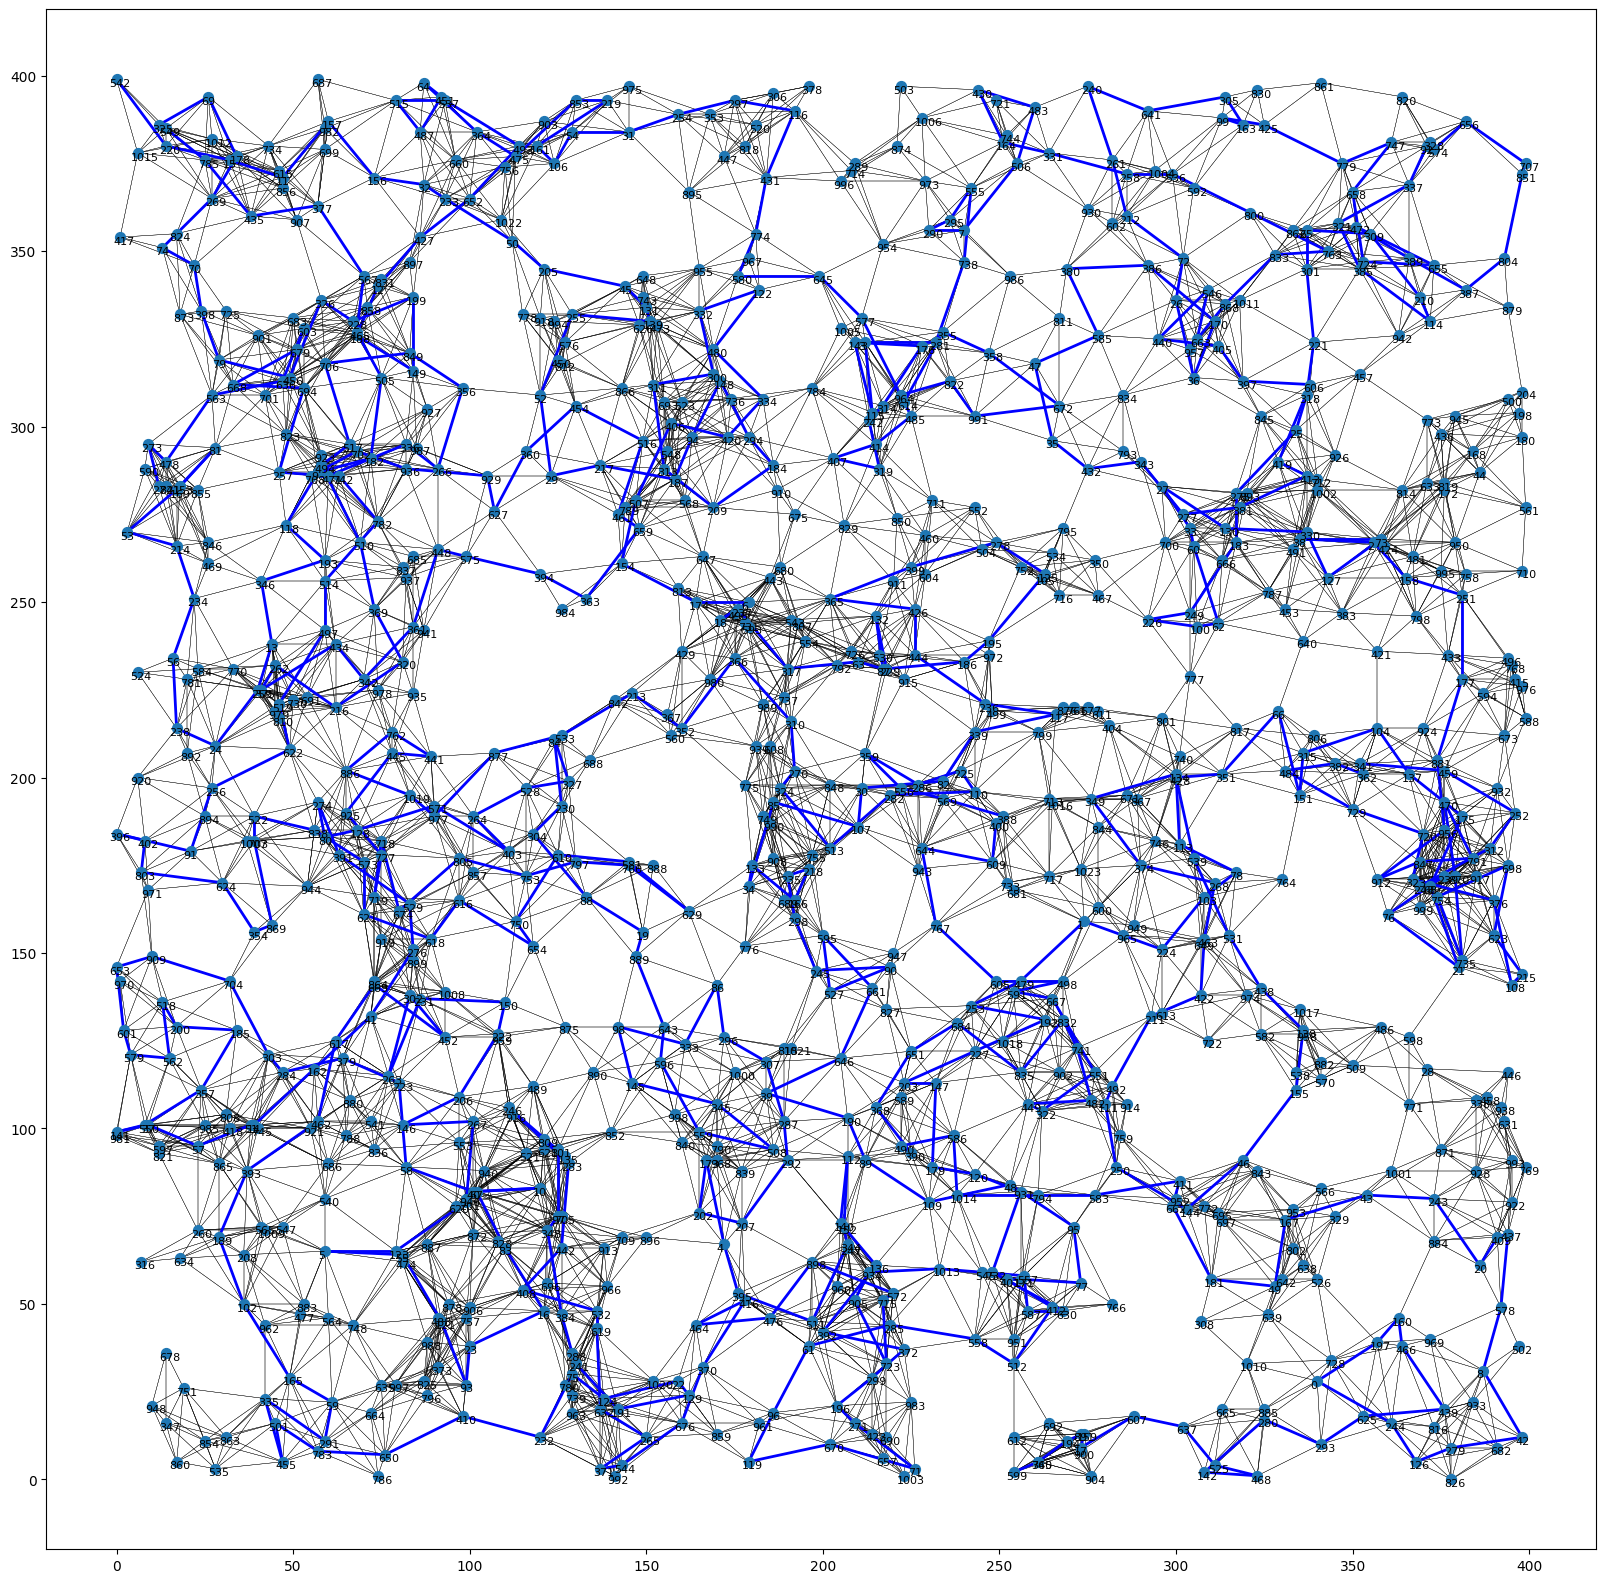

In [19]:
# visualize
visualize(points, adjList, dfs_path)

In [12]:
# astar
astar_path = aStar(adjList, utils.getDistance, points, 542, 599)

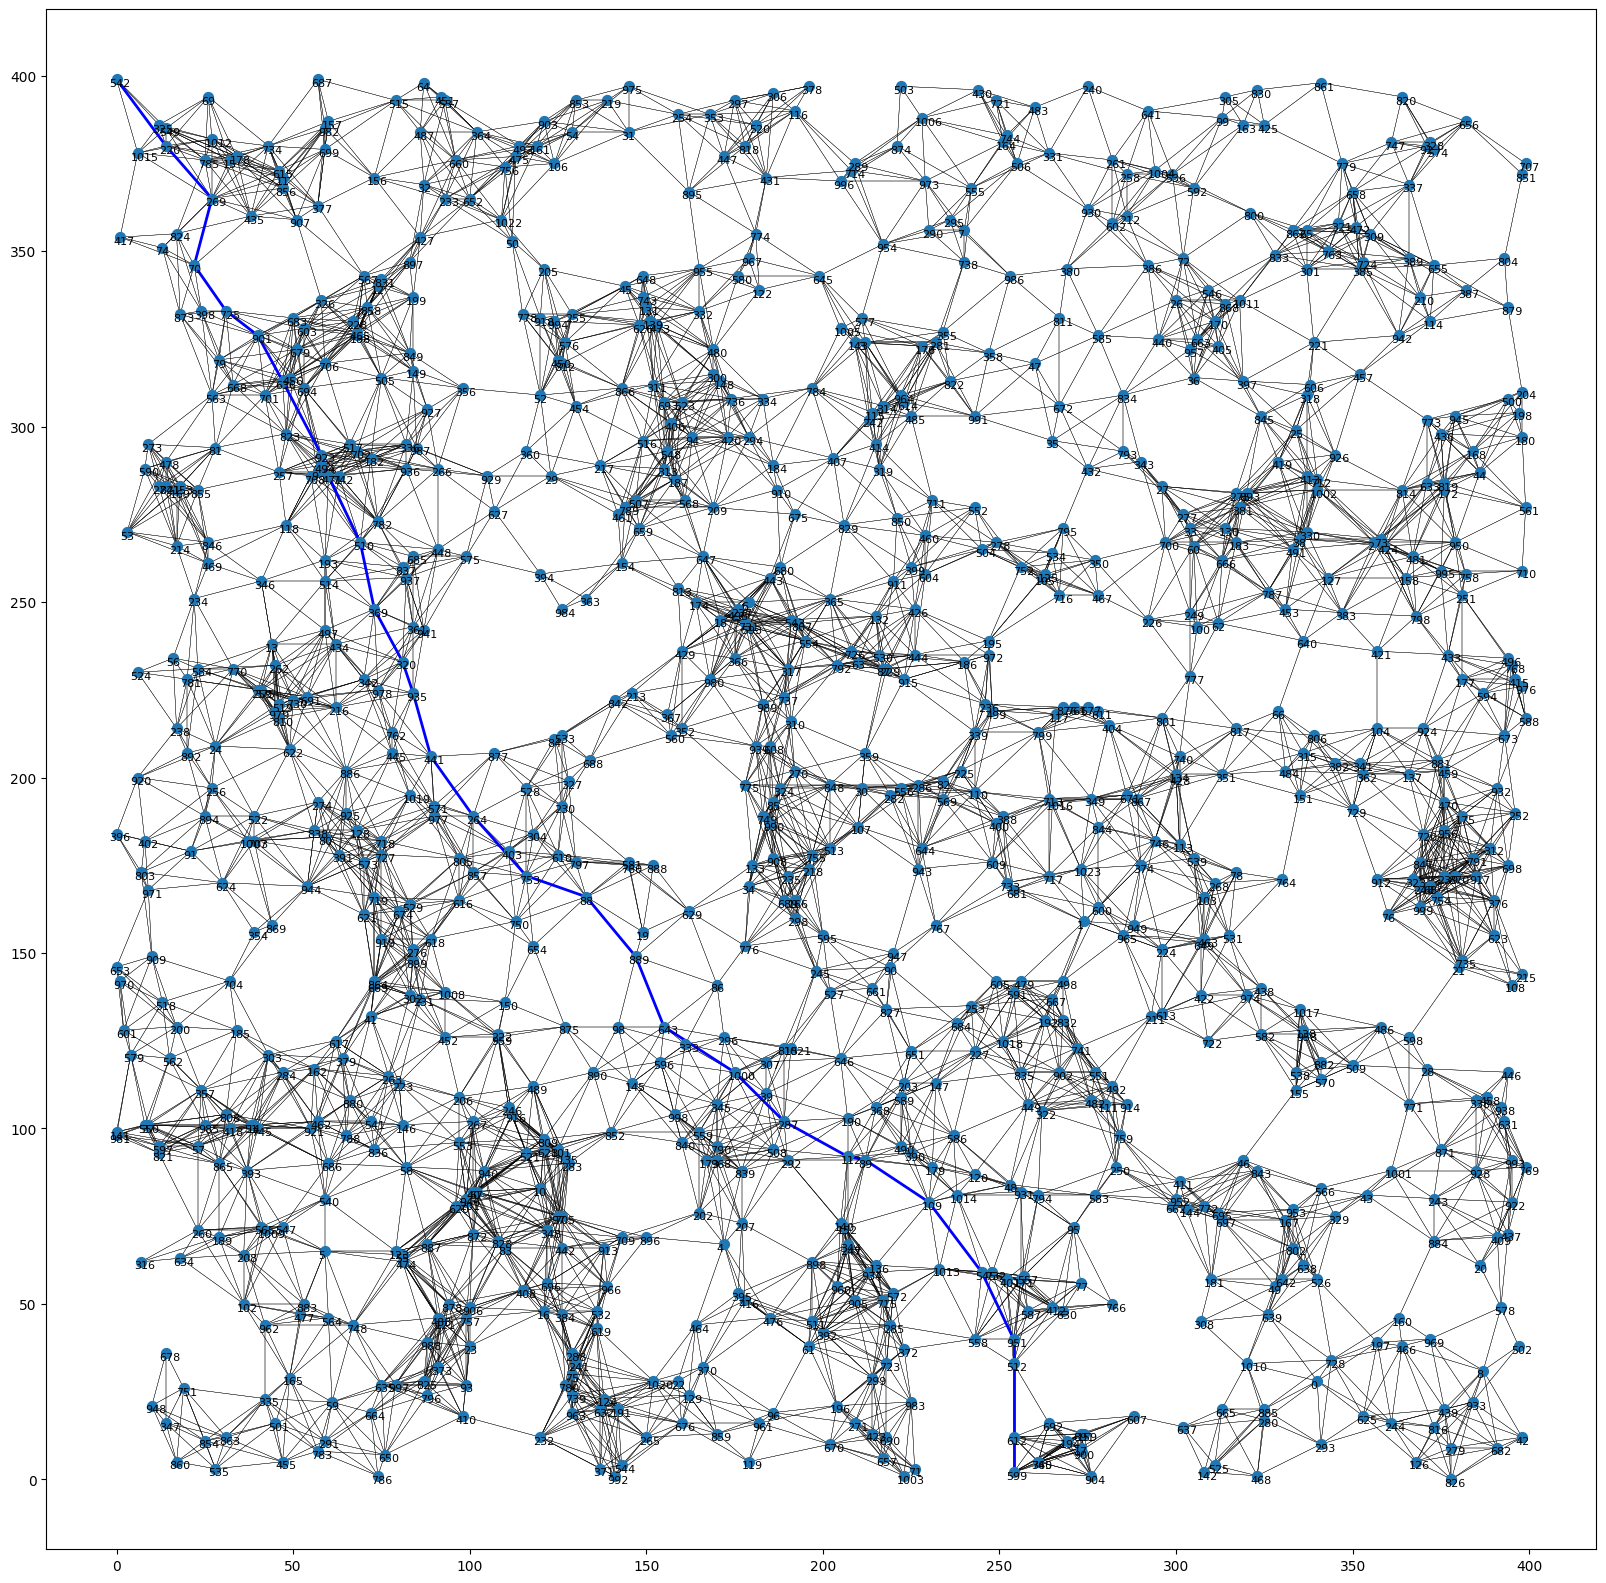

In [20]:
# visualize astar path
visualize(points, adjList, astar_path)

In [9]:
print(f"Dfs Cost: {utils.getCost(points, dfs_path)}")
print(f"Astar Cost: {utils.getCost(points, astar_path)}")
print(f"dfs/astar: {utils.getCost(points, dfs_path)/utils.getCost(points, astar_path)}")

Dfs Cost: 9335.050952263802
Astar Cost: 506.6646617711265
dfs/astar: 18.424515575314953


In [18]:
from matplotlib.collections import LineCollection
import numpy as np


# blue
def visualize(points, adjList, path=None, offset=np.array([-2, -2])):
  fig, ax = plt.subplots()

  # show connections/edges
  lines = []
  for sNode in adjList.keys():
    for eNode in adjList[sNode]:
      lines.append([
        points[sNode],
        points[eNode]
      ])
  ax.add_collection(LineCollection(lines, color="black", lw=0.25, zorder=1))

  # show path
  if path:
    pLines = []
    path2 = path + [path[-1]]
    lines = [[
      points[node],
      points[path2[i+1]]
    ] for i, node in enumerate(path) if node != path2[i+1]]
    ax.add_collection(LineCollection(lines, color="blue", lw=2, zorder=2))

  # show nodes/vertices
  ax.scatter(points[:, 0], points[:, 1], zorder=3, s=50)

  # add text
  for i, position in enumerate(points):
    ax.annotate(i, position + offset, zorder=4, size=8)

  plt.show()